In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
suicide = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\crudeSuicideRates.csv")

In [5]:
suicide.head(10)

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8
5,Afghanistan,2015,Crude suicide rates (per 100 000 population),Female,1.5
6,Afghanistan,2010,Crude suicide rates (per 100 000 population),Both sexes,5.1
7,Afghanistan,2010,Crude suicide rates (per 100 000 population),Male,8.6
8,Afghanistan,2010,Crude suicide rates (per 100 000 population),Female,1.4
9,Afghanistan,2005,Crude suicide rates (per 100 000 population),Both sexes,6.3


In [6]:
allCountries = suicide['Location'].unique().tolist()

In [8]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = suicide[suicide['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Cancer Mortality Rate incidence")
    plt.title("Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease")
    plt.show()

In [9]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

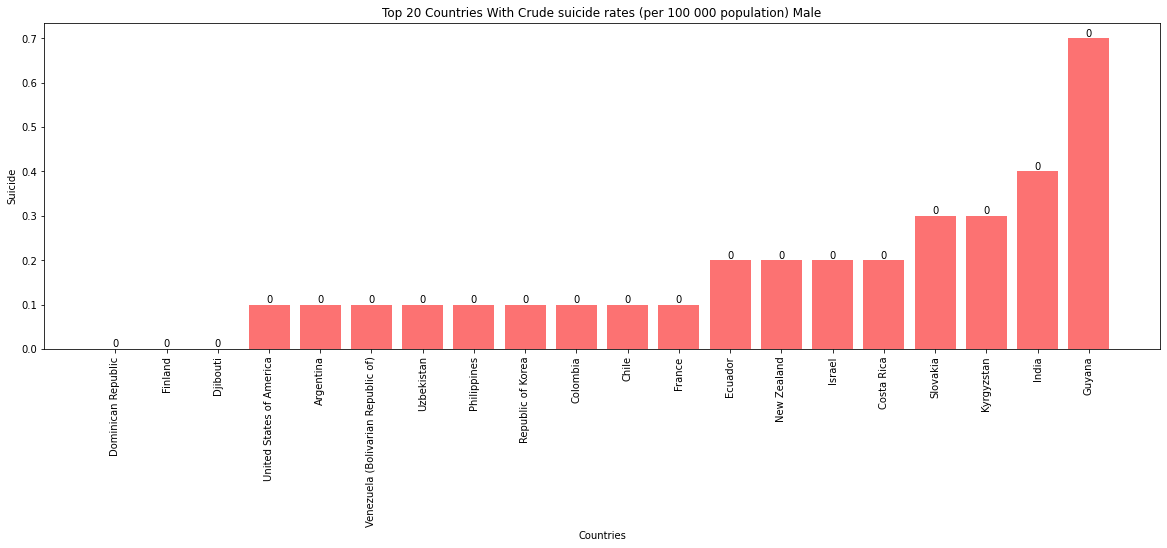

In [11]:
tempData = suicide[suicide['Period'] == 2016] 
tempData=tempData[tempData['Dim1']=='Male']
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Suicide")
plt.title("Top 20 Countries With Crude suicide rates (per 100 000 population) Male")
plt.show()

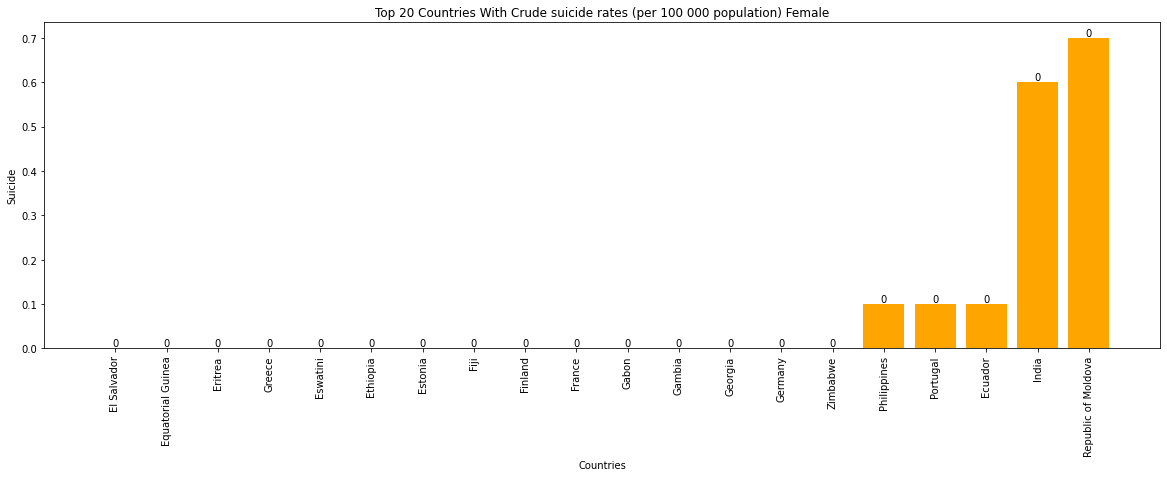

In [17]:
tempData = suicide[suicide['Period'] == 2016] 
tempData=tempData[tempData['Dim1']=='Female']
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "orange")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Suicide")
plt.title("Top 20 Countries With Crude suicide rates (per 100 000 population) Female")
plt.show()

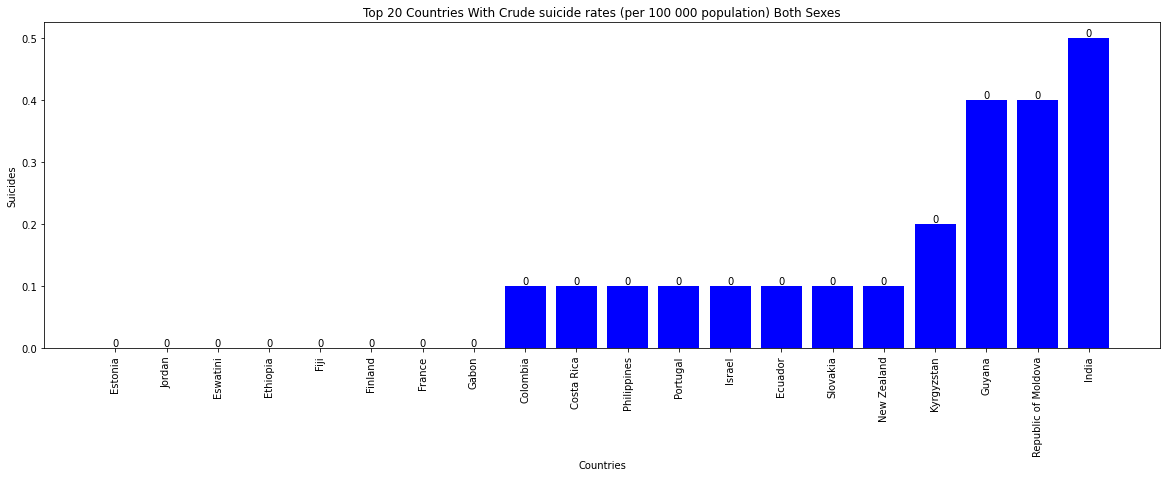

In [20]:
tempData = suicide[suicide['Period'] == 2016] 
tempData=tempData[tempData['Dim1']=='Both sexes']
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "blue")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Suicides")
plt.title("Top 20 Countries With Crude suicide rates (per 100 000 population) Both Sexes")
plt.show()

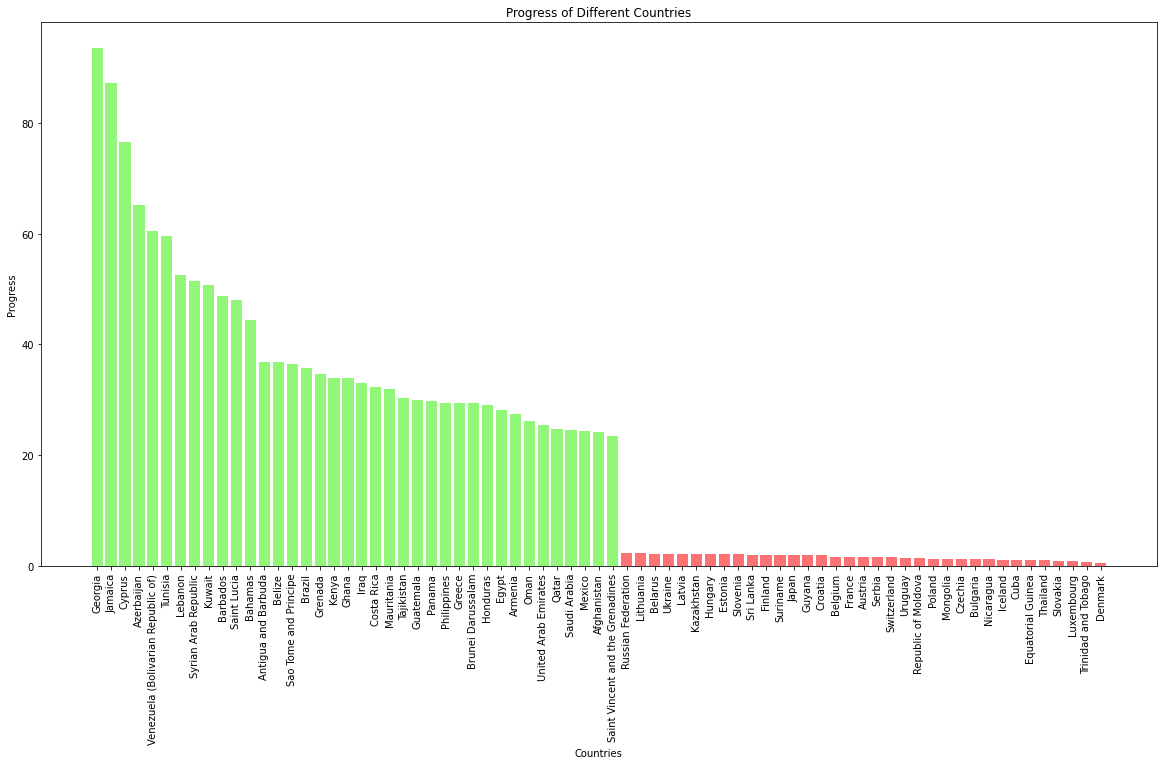

In [21]:

tempData2016 = suicide[suicide['Period'] == 2016]
tempData2000 = suicide[suicide['Period'] == 2000]
tempData2016.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2016.join(tempData2000, lsuffix='_16', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_16']
tempData = tempData[['Location_16', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[-50:]
tempDataBot = tempData[:50]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_16'], tempDataBot['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_16'], tempDataTop['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()


In [22]:
def lines(data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    probs = data[data['Dim1']=='Both sexes']['First Tooltip'].sort_values()
    least_keys, most_keys = probs[1:4], probs[-4:-1]
    least = data['Location'][least_keys.keys()]
    most = data['Location'][most_keys.keys()]
    freq = pd.DataFrame({'Least':least.reset_index(drop=True), 'Most':most.reset_index(drop=True)})

    for title in freq:
        for country in freq[title]:
            ax = axes[list(freq).index(title)][list(freq[title]).index(country)]
            df = data[data['Location']==country]

            both = df[df['Dim1']=='Both sexes']['First Tooltip']
            fema = df[df['Dim1']=='Male']['First Tooltip']
            male = df[df['Dim1']=='Female']['First Tooltip']
            years = np.unique(df['Period'])[::-1]

            ax.plot(years, both, label='Both sexes')
            ax.plot(years, fema, label='Females')
            ax.plot(years, male, label='Males')

            ax.set_title(title)
            ax.set_xlabel('Years in ' + country)
            ax.set_ylabel('Probability (%)')
            ax.legend()

    plt.suptitle(data['Indicator'].iloc[0])
    plt.show()

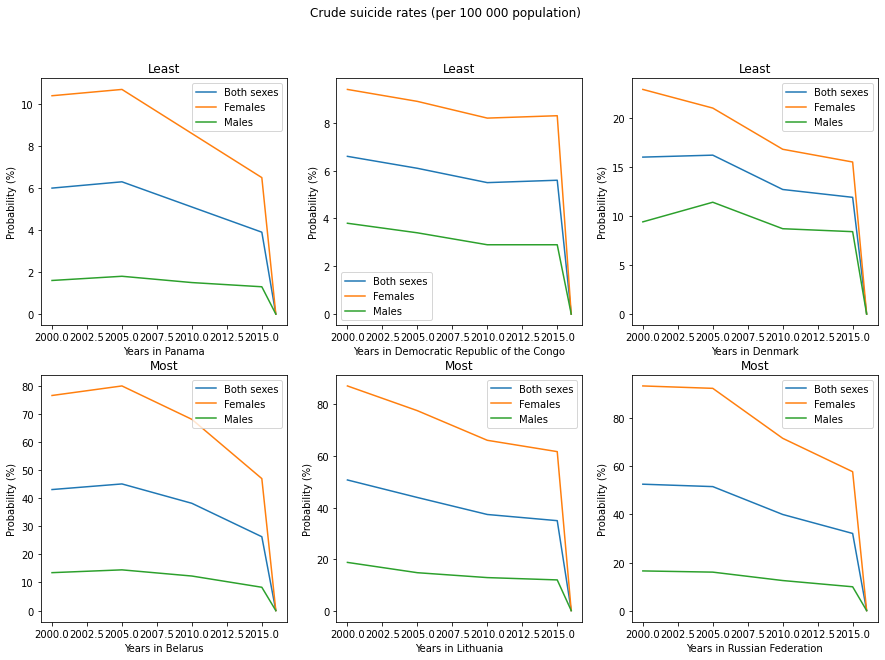

In [23]:
lines(suicide)

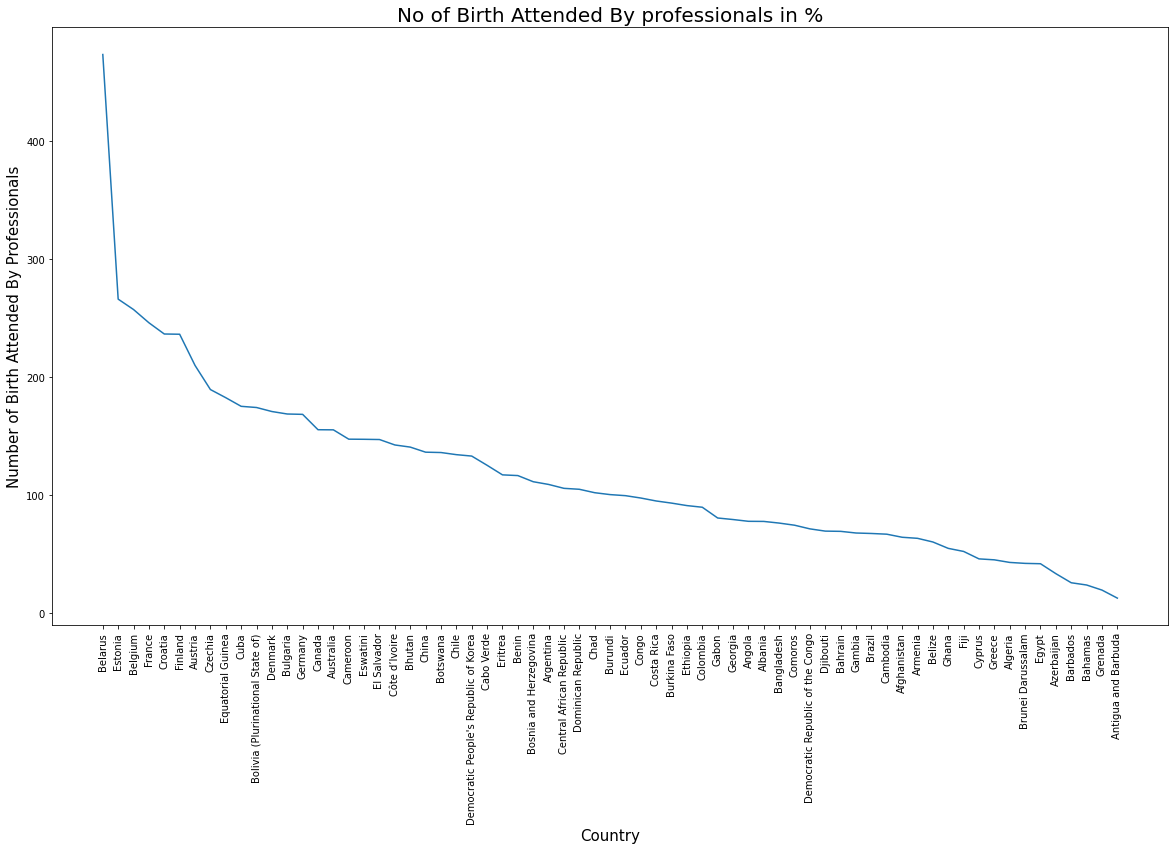

In [27]:
df = suicide[suicide['Location']=='Afghanistan']
water_sort = pd.DataFrame([])
water_sort0 = []
water_sort1 = []
index = []

for i in np.unique(suicide['Location'][:1000]):
    water_sort0.append(i)
    water_sort1.append(suicide['First Tooltip'][suicide['Location']==i].sum())
    index.append(list(suicide['Location'][suicide['Location']==i].index)[0])
    
water_sort['Name'] = water_sort0
water_sort['Value'] = water_sort1
water_sort.index = index
water_sort = water_sort.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(20, 11))
plt.plot(water_sort['Name'], water_sort['Value'])
plt.title('No of Birth Attended By professionals in %', size=20)
plt.xlabel('Country', size=15)
plt.ylabel('Number of Birth Attended By Professionals', size=15)
plt.xticks(rotation=90, size=10)
plt.show()